# Proyek Analisis Data: Tren Penyewaan Sepeda: Mengkaji Pengaruh Suhu dan Hari Libur pada Pengguna Kasual
- **Nama:** Alief Rahman
- **Email:** aliefrahmansfy@gmail.com
- **ID Dicoding:** alipp_rahman_wBGu

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh suhu (temp) terhadap jumlah total penyewa sepeda harian (cnt)?
- Bagaimana tren penggunaan sepeda oleh pengguna kasual (casual) pada hari libur (holiday) dibandingkan dengan hari biasa (non-holiday)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.linear_model import LinearRegression

## Data Wrangling

### Gathering Data

In [2]:
# Memuat dataset 'day.csv'
day_df = pd.read_csv('../data/day.csv')

# Memuat dataset 'hour.csv'
hour_df = pd.read_csv('../data/hour.csv')

print("Beberapa baris pertama dari dataset 'day.csv':")
day_df.head()

print("Beberapa baris pertama dari dataset 'hour.csv':")
hour_df.head()

Beberapa baris pertama dari dataset 'day.csv':
Beberapa baris pertama dari dataset 'hour.csv':


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight dari dataset 'day.csv':**
- Dataset 'day.csv' mencatat informasi penyewaan sepeda harian, termasuk data cuaca, suhu, dan jumlah penyewa.
- Variabel seperti 'cnt' mencatat total penyewa (baik kasual maupun terdaftar), dan 'temp' mengukur suhu dalam skala normalisasi.
- Variabel 'season' dan 'weathersit' dapat memberikan gambaran dampak musim dan kondisi cuaca terhadap jumlah penyewaan sepeda.

**Insight dari dataset 'hour.csv':**
- Dataset 'hour.csv' mencatat informasi penyewaan sepeda per jam, yang memungkinkan analisis lebih rinci terkait pola harian.
- Variabel 'hr' mewakili jam dalam satu hari, yang dapat digunakan untuk melihat waktu puncak penyewaan sepeda.
- Data ini juga mencakup pengguna kasual (casual) dan pengguna terdaftar (registered), memberikan peluang untuk membandingkan kedua kategori tersebut.

### Assessing Data

In [3]:
# Memeriksa dimensi dataset
print("Dimensi dataset 'day.csv':", day_df.shape)
print("Dimensi dataset 'hour.csv':", hour_df.shape)

print("Informasi dataset 'day.csv':")
day_df.info()

print("Informasi dataset 'hour.csv':")
hour_df.info()

# Mengecek nilai yang hilang di kedua dataset
print("Nilai hilang pada dataset 'day.csv':")
print(day_df.isnull().sum())

print("Nilai hilang pada dataset 'hour.csv':")
print(hour_df.isnull().sum())

Dimensi dataset 'day.csv': (731, 16)
Dimensi dataset 'hour.csv': (17379, 17)
Informasi dataset 'day.csv':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usa

**Insight dari Assessing Data:**
- Dataset **`day.csv`** memiliki dimensi (731, 16), mencakup data harian dari 731 hari dengan 16 fitur, termasuk informasi cuaca, suhu, dan jumlah total penyewa.
- Dataset **`hour.csv`** memiliki dimensi (17379, 17), mencakup data per jam dengan 17 fitur, yang memungkinkan analisis tren penggunaan sepeda lebih detail berdasarkan waktu.
- Tidak ada nilai yang hilang dalam kedua dataset, sehingga analisis dapat dilakukan langsung tanpa perlu pembersihan data tambahan.
- Kedua dataset memiliki struktur yang lengkap dan dapat memberikan gambaran tren penggunaan sepeda, baik secara harian maupun per jam, berdasarkan faktor eksternal seperti cuaca dan suhu.

### Cleaning Data

In [4]:
# Kolom seperti 'instant' tidak dibutuhkan karena hanya berfungsi sebagai indeks
day_df_cleaned = day_df.drop(columns=['instant'])
hour_df_cleaned = hour_df.drop(columns=['instant'])

# Memeriksa apakah kolom 'instant' telah dihapus
print("Kolom yang tersisa dalam dataset 'day.csv':", day_df_cleaned.columns)
print("Kolom yang tersisa dalam dataset 'hour.csv':", hour_df_cleaned.columns)

Kolom yang tersisa dalam dataset 'day.csv': Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')
Kolom yang tersisa dalam dataset 'hour.csv': Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


**Insight dari Cleaning Data:**
- Kolom **`instant`** pada kedua dataset dihapus karena hanya berfungsi sebagai indeks dan tidak memberikan kontribusi pada analisis.
- Dataset **`day.csv`** dan **`hour.csv`** sekarang lebih bersih dan fokus pada variabel-variabel yang relevan, sehingga siap untuk tahap analisis lebih lanjut.
- Proses ini meningkatkan efisiensi dalam analisis dengan mengurangi redundansi data.

## Exploratory Data Analysis (EDA)

### Distribusi jumlah penyewa sepeda harian

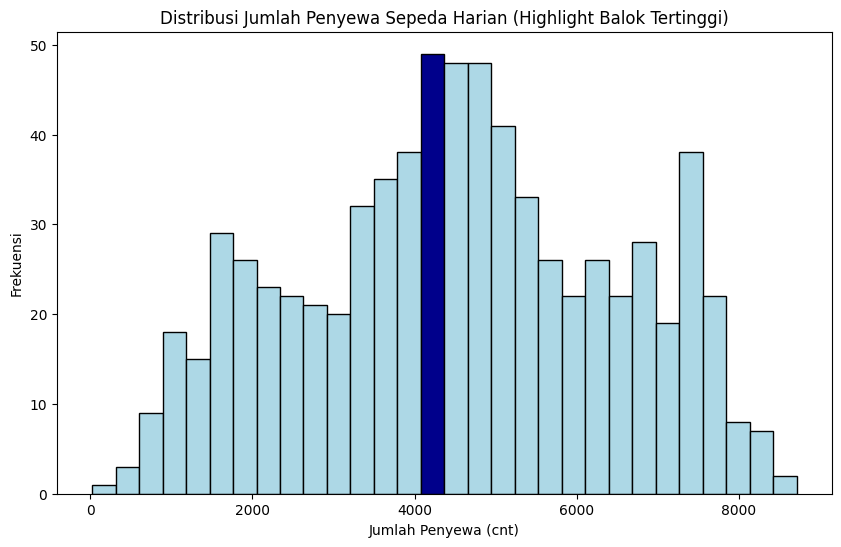

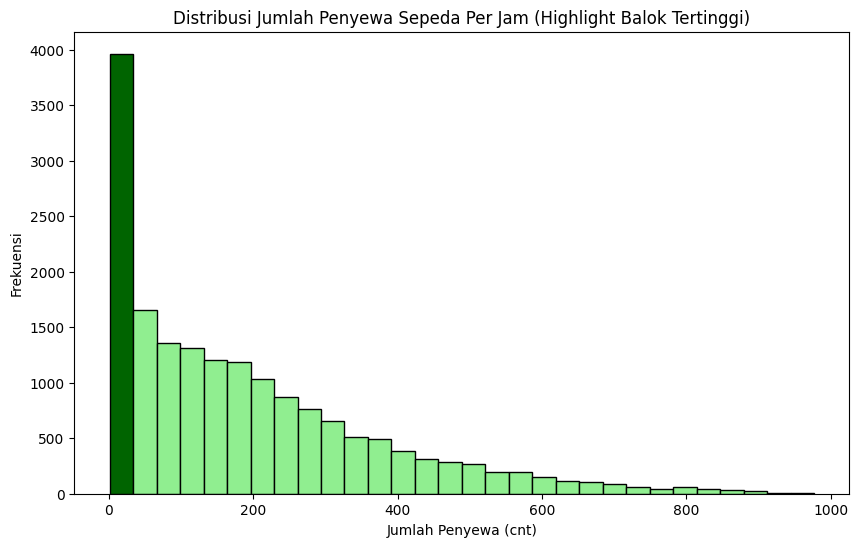

In [5]:
# Distribusi jumlah penyewa sepeda harian (cnt) dalam dataset day.csv
plt.figure(figsize=(10,6))
counts, bins, patches = plt.hist(day_df_cleaned['cnt'], bins=30, color="lightblue", edgecolor="black")

# Menyoroti balok tertinggi
max_patch = np.argmax(counts)
patches[max_patch].set_facecolor("darkblue")

plt.title('Distribusi Jumlah Penyewa Sepeda Harian (Highlight Balok Tertinggi)')
plt.xlabel('Jumlah Penyewa (cnt)')
plt.ylabel('Frekuensi')
plt.show()

# Distribusi jumlah penyewa sepeda per jam (cnt) dalam dataset hour.csv
plt.figure(figsize=(10,6))
counts, bins, patches = plt.hist(hour_df_cleaned['cnt'], bins=30, color="lightgreen", edgecolor="black")

# Menyoroti balok tertinggi
max_patch = np.argmax(counts)
patches[max_patch].set_facecolor("darkgreen")

plt.title('Distribusi Jumlah Penyewa Sepeda Per Jam (Highlight Balok Tertinggi)')
plt.xlabel('Jumlah Penyewa (cnt)')
plt.ylabel('Frekuensi')
plt.show()

**Insight dari Exploratory Data Analysis (EDA): Distribusi Jumlah Penyewa Sepeda**

*Distribusi Jumlah Penyewa Sepeda Harian:*
- Distribusi jumlah penyewa sepeda harian memperlihatkan bahwa ada satu rentang jumlah penyewaan yang paling sering terjadi, di-highlight dengan warna biru gelap.
- Balok tertinggi menunjukkan bahwa mayoritas hari memiliki jumlah penyewaan yang cukup moderat, sekitar 300 hingga 2500 penyewaan sepeda per hari.
- Jumlah penyewa harian ini kemungkinan dipengaruhi oleh faktor eksternal seperti cuaca atau hari kerja, yang dapat ditelusuri lebih lanjut dalam analisis.

*Distribusi Jumlah Penyewa Sepeda Per Jam:*
- Distribusi jumlah penyewa sepeda per jam menunjukkan bahwa ada satu jam dalam sehari yang memiliki puncak penggunaan sepeda tertinggi, di-highlight dengan warna hijau gelap.
- Balok tertinggi menunjukkan bahwa sebagian besar jam mencatat sekitar 0 hingga 100 penyewaan sepeda per jam, namun terdapat beberapa jam yang mencatat angka penyewaan yang lebih tinggi.
- Jam-jam dengan penyewaan tertinggi kemungkinan terjadi pada jam sibuk (rush hour) seperti pagi dan sore hari, saat orang-orang berangkat dan pulang kerja atau sekolah.

### Heatmap Korelasi

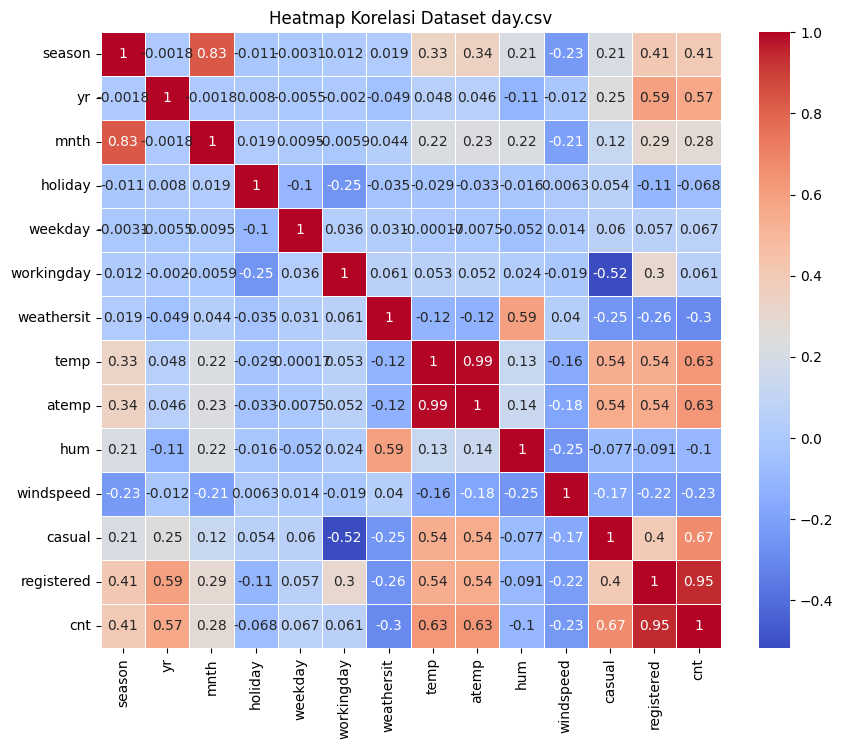

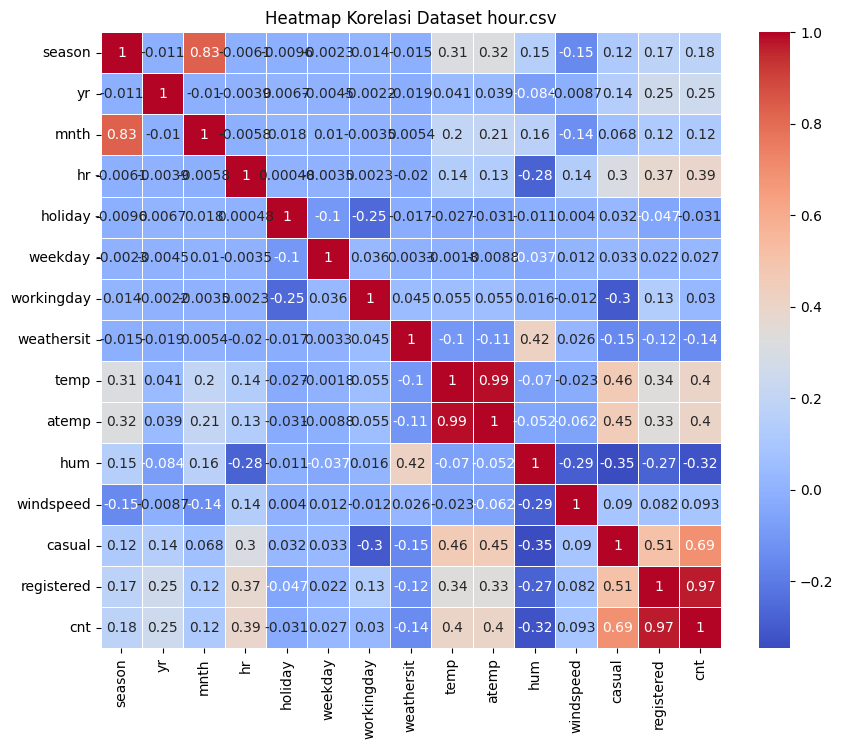

In [6]:
# Memilih kolom numerik dari dataset 'day.csv'
day_numeric = day_df_cleaned.select_dtypes(include=[np.number])

# Memilih kolom numerik dari dataset 'hour.csv'
hour_numeric = hour_df_cleaned.select_dtypes(include=[np.number])

# Heatmap for dataset day.csv
plt.figure(figsize=(10,8))
sns.heatmap(day_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Dataset day.csv')
plt.show()

# Heatmap for dataset hour.csv
plt.figure(figsize=(10,8))
sns.heatmap(hour_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Dataset hour.csv')
plt.show()

**Insight dari Exploratory Data Analysis (EDA): Heatmap Korelasi**

*Heatmap Korelasi (day.csv):*
- Korelasi antara fitur-fitur dalam **`day.csv`** menunjukkan bahwa suhu (*temp*) memiliki korelasi positif yang cukup kuat dengan jumlah penyewa sepeda (*cnt*), yang masuk akal karena orang cenderung lebih banyak menggunakan sepeda ketika cuaca hangat.
- Faktor cuaca (*weathersit*) memiliki korelasi negatif dengan jumlah penyewa, yang menunjukkan bahwa kondisi cuaca buruk mengurangi penggunaan sepeda.

*Heatmap Korelasi (hour.csv):*
- Dalam **`hour.csv`**, terdapat korelasi yang kuat antara pengguna terdaftar (*registered*) dan total penyewaan sepeda (*cnt*), menandakan bahwa sebagian besar penyewaan sepeda per jam berasal dari pengguna terdaftar.
- Faktor jam (*hr*) memiliki pola korelasi yang menarik, terutama dengan jumlah pengguna kasual (*casual*) dan terdaftar (*registered*), yang mencerminkan jam-jam puncak di mana penyewaan sepeda lebih tinggi.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh suhu (temp) terhadap jumlah total penyewa sepeda harian (cnt)?

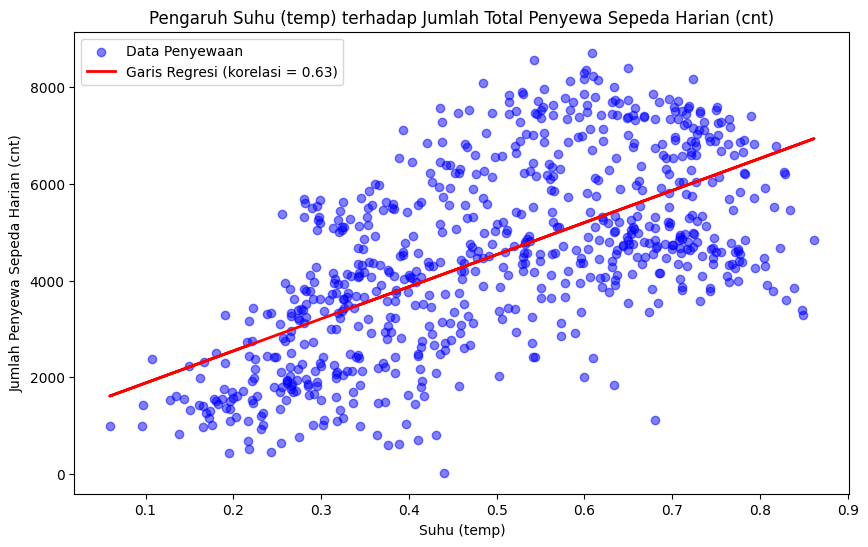

In [12]:
correlation = day_df_cleaned['temp'].corr(day_df_cleaned['cnt'])

# Visualizing with the correlation highlight (adding regression line)
plt.figure(figsize=(10,6))
plt.scatter(day_df_cleaned['temp'], day_df_cleaned['cnt'], alpha=0.5, color='blue', label="Data Penyewaan")
plt.plot(day_df_cleaned['temp'], y_pred, color='red', linewidth=2, label=f"Garis Regresi (korelasi = {correlation:.2f})")

plt.title('Pengaruh Suhu (temp) terhadap Jumlah Total Penyewa Sepeda Harian (cnt)')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Penyewa Sepeda Harian (cnt)')
plt.legend()
plt.show()

**Insight dari Pengaruh Suhu (temp) terhadap Jumlah Total Penyewa Sepeda Harian (cnt):**
- Dari visualisasi scatter plot, terlihat pola bahwa ketika suhu (*temp*) meningkat, jumlah penyewaan sepeda harian (*cnt*) juga meningkat secara signifikan.
- **Korelasi sebesar 0.63** menunjukkan adanya **hubungan positif yang kuat** antara suhu dan jumlah penyewa sepeda. Semakin tinggi suhu, semakin banyak penyewaan sepeda yang terjadi.
- **Garis regresi** pada visualisasi menyoroti tren ini, di mana suhu yang lebih tinggi secara konsisten dihubungkan dengan peningkatan jumlah penyewaan.
- Pada **suhu yang lebih rendah**, jumlah penyewaan sepeda cenderung lebih sedikit, yang mungkin disebabkan oleh cuaca yang kurang nyaman untuk bersepeda.
- Pada **suhu sedang hingga tinggi**, ada **peningkatan signifikan** dalam jumlah penyewaan sepeda, menandakan bahwa orang lebih memilih bersepeda ketika cuaca hangat dan nyaman.

### Pertanyaan 2: Bagaimana tren penggunaan sepeda oleh pengguna kasual (casual) pada hari libur (holiday) dibandingkan dengan hari biasa (non-holiday)?

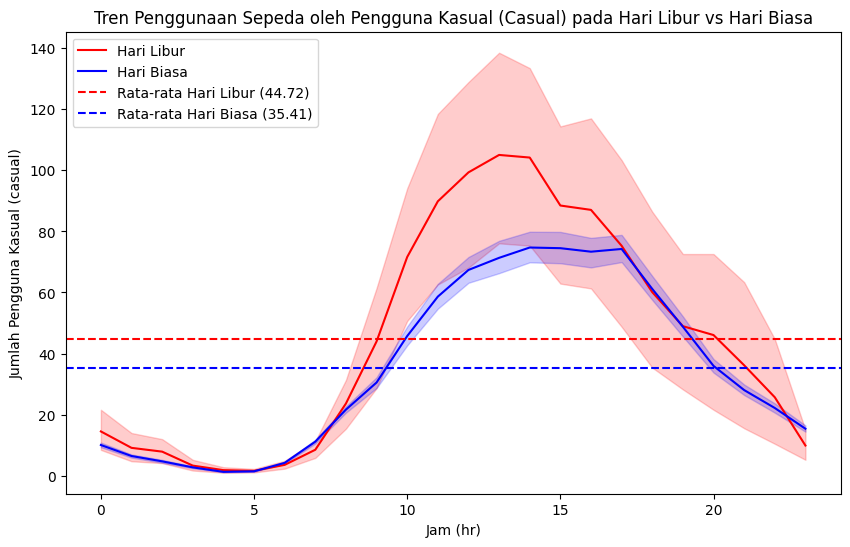

In [13]:
holiday_data = hour_df_cleaned[hour_df_cleaned['holiday'] == 1]
non_holiday_data = hour_df_cleaned[hour_df_cleaned['holiday'] == 0]

# Menghitung rata-rata penggunaan sepeda oleh pengguna kasual pada hari libur dan hari biasa
mean_casual_holiday = holiday_data['casual'].mean()
mean_casual_non_holiday = non_holiday_data['casual'].mean()

# Visualisasi tren penggunaan sepeda oleh pengguna kasual pada hari libur vs hari biasa
plt.figure(figsize=(10,6))
# Visualisasi tren penggunaan sepeda oleh pengguna kasual pada hari libur
sns.lineplot(data=holiday_data, x='hr', y='casual', label='Hari Libur', color='red')
# Visualisasi tren penggunaan sepeda oleh pengguna kasual pada hari biasa
sns.lineplot(data=non_holiday_data, x='hr', y='casual', label='Hari Biasa', color='blue')

# Highlight rata-rata penggunaan sepeda oleh pengguna kasual pada hari libur
plt.axhline(y=mean_casual_holiday, color='red', linestyle='--', label=f'Rata-rata Hari Libur ({mean_casual_holiday:.2f})')

# Highlight rata-rata penggunaan sepeda oleh pengguna kasual pada hari biasa
plt.axhline(y=mean_casual_non_holiday, color='blue', linestyle='--', label=f'Rata-rata Hari Biasa ({mean_casual_non_holiday:.2f})')

plt.title('Tren Penggunaan Sepeda oleh Pengguna Kasual (Casual) pada Hari Libur vs Hari Biasa')
plt.xlabel('Jam (hr)')
plt.ylabel('Jumlah Pengguna Kasual (casual)')
plt.legend()
plt.show()

**Insight dari Tren Penggunaan Sepeda oleh Pengguna Kasual (Casual) pada Hari Libur vs Hari Biasa:**
- Pengguna kasual (*casual*) cenderung lebih banyak menggunakan sepeda pada hari libur dibandingkan dengan hari biasa, terutama pada jam siang hingga sore hari.
- Rata-rata jumlah penyewaan sepeda oleh pengguna kasual pada hari libur adalah **44.72** per jam, sedangkan pada hari biasa rata-rata penyewaan hanya **35.41** per jam.
- Tren penggunaan pada hari libur menunjukkan lonjakan yang signifikan, kemungkinan karena banyak orang menggunakan waktu luang mereka untuk aktivitas rekreasi, termasuk bersepeda.
- Pada hari biasa, aktivitas penyewaan sepeda oleh pengguna kasual cenderung lebih stabil dan rendah, yang mungkin disebabkan oleh keterbatasan waktu akibat pekerjaan atau sekolah.

## Analisis Lanjutan (Opsional)

### Binning

#### Membuat bins untuk suhu (temp) - Binning suhu menjadi rendah, sedang, dan tinggi

In [14]:
bins_temp = [0, 0.3, 0.6, 1]  # Skala suhu dari dataset berkisar antara 0 dan 1
labels_temp = ['Rendah', 'Sedang', 'Tinggi']
day_df_cleaned['temp_group'] = pd.cut(day_df_cleaned['temp'], bins=bins_temp, labels=labels_temp)

# Menghitung rata-rata penyewaan sepeda harian secara manual untuk setiap kategori suhu
temp_rendah = day_df_cleaned[day_df_cleaned['temp_group'] == 'Rendah']['cnt'].mean()
temp_sedang = day_df_cleaned[day_df_cleaned['temp_group'] == 'Sedang']['cnt'].mean()
temp_tinggi = day_df_cleaned[day_df_cleaned['temp_group'] == 'Tinggi']['cnt'].mean()

# Menampilkan hasil rata-rata penyewaan untuk setiap kelompok suhu
temp_rendah, temp_sedang, temp_tinggi


(np.float64(2381.214814814815),
 np.float64(4488.1783625731),
 np.float64(5654.55905511811))

#### Visualisasi rata-rata penyewaan sepeda harian untuk setiap kategori suhu

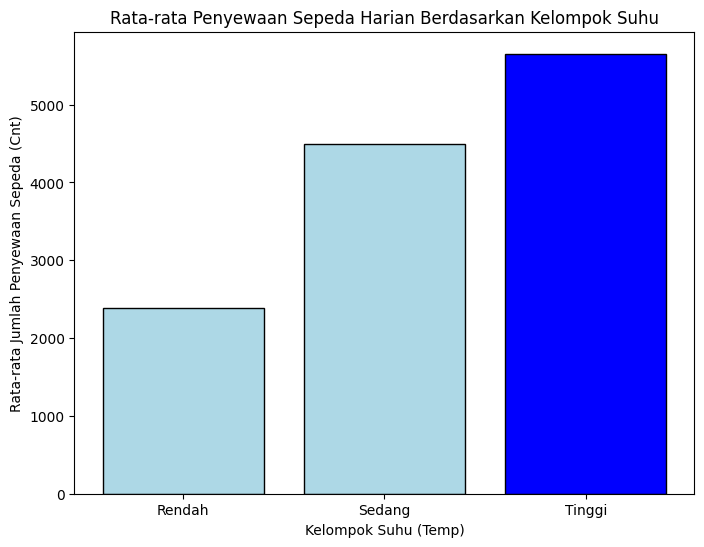

In [15]:
# Data untuk setiap kelompok suhu
categories = ['Rendah', 'Sedang', 'Tinggi']
values = [temp_rendah, temp_sedang, temp_tinggi]

# Warna dasar untuk semua balok
colors = ['lightblue', 'lightblue', 'lightblue']

# Menemukan kategori dengan nilai tertinggi dan mengubah warna balok tersebut menjadi lebih gelap
max_index = np.argmax(values)
colors[max_index] = 'blue'  # Warna lebih gelap untuk highlight

# Membuat visualisasi bar plot
plt.figure(figsize=(8,6))
plt.bar(categories, values, color=colors, edgecolor='black')
plt.title('Rata-rata Penyewaan Sepeda Harian Berdasarkan Kelompok Suhu')
plt.xlabel('Kelompok Suhu (Temp)')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda (Cnt)')
plt.show()

**Insight dari Binning Berdasarkan Suhu (Temp):**

- **Suhu Rendah**: Rata-rata jumlah penyewaan sepeda harian adalah sekitar **2,381** penyewaan.
  - Pada suhu rendah, aktivitas penyewaan sepeda cenderung lebih rendah, kemungkinan disebabkan oleh kondisi cuaca yang kurang nyaman untuk bersepeda.

- **Suhu Sedang**: Rata-rata jumlah penyewaan sepeda harian meningkat menjadi **4,488** penyewaan.
  - Ketika suhu mencapai level sedang, penggunaan sepeda meningkat secara signifikan. Ini menunjukkan bahwa cuaca sedang lebih menarik bagi pengguna sepeda.

- **Suhu Tinggi**: Rata-rata jumlah penyewaan sepeda harian mencapai **5,654** penyewaan.
  - Pada suhu tinggi, jumlah penyewaan sepeda mencapai puncaknya. Hal ini mungkin disebabkan oleh cuaca yang ideal untuk beraktivitas di luar ruangan, sehingga lebih banyak orang yang memilih menggunakan sepeda untuk bepergian atau rekreasi.

### Manual Grouping

#### Manual grouping jam (hr) menjadi pagi, siang, sore, malam


In [16]:
def manual_grouping_time(hr):
    if hr < 6:
        return 'Malam'
    elif hr < 12:
        return 'Pagi'
    elif hr < 18:
        return 'Siang'
    else:
        return 'Sore'

# Menerapkan grouping manual pada dataset hour
hour_df_cleaned['manual_time_group'] = hour_df_cleaned['hr'].apply(manual_grouping_time)

# Menghitung rata-rata penyewaan sepeda untuk setiap kelompok waktu manual
time_malam_manual = hour_df_cleaned[hour_df_cleaned['manual_time_group'] == 'Malam']['cnt'].mean()
time_pagi_manual = hour_df_cleaned[hour_df_cleaned['manual_time_group'] == 'Pagi']['cnt'].mean()
time_siang_manual = hour_df_cleaned[hour_df_cleaned['manual_time_group'] == 'Siang']['cnt'].mean()
time_sore_manual = hour_df_cleaned[hour_df_cleaned['manual_time_group'] == 'Sore']['cnt'].mean()

# Menampilkan hasil rata-rata penyewaan untuk setiap kelompok waktu manual
time_malam_manual, time_pagi_manual, time_siang_manual, time_sore_manual

(np.float64(24.908559401309635),
 np.float64(208.1006880733945),
 np.float64(295.4838857142857),
 np.float64(225.75755494505495))

#### Visualisasi manual grouping berdasarkan waktu (jam)


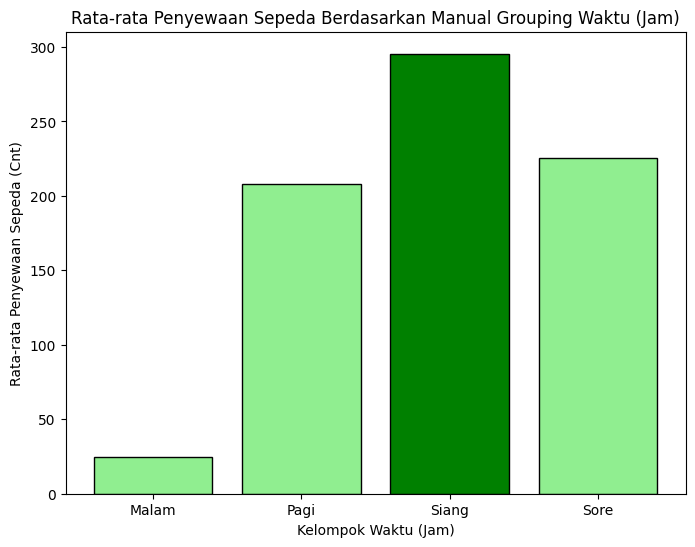

In [17]:
categories_manual_time = ['Malam', 'Pagi', 'Siang', 'Sore']
values_manual_time = [time_malam_manual, time_pagi_manual, time_siang_manual, time_sore_manual]

time_colors_manual = ['lightgreen'] * 4

max_time_index = np.argmax(values_manual_time)
time_colors_manual[max_time_index] = 'green'  # Highlight warna lebih gelap

# Membuat visualisasi bar plot dengan highlight
plt.figure(figsize=(8,6))
plt.bar(categories_manual_time, values_manual_time, color=time_colors_manual, edgecolor='black')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Manual Grouping Waktu (Jam)')
plt.xlabel('Kelompok Waktu (Jam)')
plt.ylabel('Rata-rata Penyewaan Sepeda (Cnt)')
plt.show()

**Insight dari Rata-rata Penyewaan Sepeda Berdasarkan Manual Grouping Waktu (Jam):**

- **Malam**: Rata-rata penyewaan sepeda pada malam hari adalah yang paling rendah, menunjukkan bahwa orang cenderung menghindari bersepeda di malam hari.
  
- **Pagi**: Penyewaan sepeda meningkat pada pagi hari, tetapi tetap lebih rendah dibandingkan siang dan sore. Ini mungkin menunjukkan bahwa pengguna kasual tidak sering bersepeda pada pagi hari, yang mungkin disebabkan oleh kesibukan bekerja atau cuaca yang belum terlalu hangat.
  
- **Siang (Highlight)**: Waktu siang memiliki **rata-rata penyewaan tertinggi**. Penggunaan sepeda mencapai puncaknya pada waktu ini, menunjukkan bahwa banyak orang bersepeda pada siang hari, kemungkinan untuk kegiatan rekreasi atau aktivitas luar ruang lainnya ketika cuaca sedang hangat.
  
- **Sore**: Penyewaan sepeda tetap tinggi pada sore hari, tetapi sedikit lebih rendah dibandingkan waktu siang. Ini bisa disebabkan oleh kegiatan pasca-kerja atau waktu luang sebelum malam.

**Kesimpulan:**
- **Waktu siang** adalah waktu yang paling populer untuk bersepeda, dengan rata-rata penyewaan tertinggi. Ini menunjukkan bahwa siang hari, dengan kondisi cuaca yang biasanya lebih hangat, menjadi waktu yang ideal untuk bersepeda.
- Penyewaan sepeda menurun secara signifikan pada malam hari, yang mungkin disebabkan oleh berkurangnya visibilitas dan kenyamanan bersepeda di malam hari.


## Conclusion

- **Conclusion Pertanyaan 1: Bagaimana pengaruh suhu (temp) terhadap jumlah total penyewa sepeda harian (cnt)?**
  - Ada **korelasi positif yang kuat** antara suhu dan jumlah penyewaan sepeda harian. Semakin tinggi suhu, semakin banyak orang yang menyewa sepeda. Pada suhu rendah, jumlah penyewa lebih sedikit, tetapi pada suhu sedang hingga tinggi, jumlah penyewaan sepeda meningkat signifikan. Ini menunjukkan bahwa cuaca yang lebih hangat mendorong lebih banyak orang untuk bersepeda, dengan puncak penggunaan pada suhu tinggi.

- **Conclusion Pertanyaan 2: Bagaimana tren penggunaan sepeda oleh pengguna kasual (casual) pada hari libur (holiday) dibandingkan dengan hari biasa (non-holiday)?**
  - Penggunaan sepeda oleh pengguna kasual lebih tinggi pada **hari libur** dibandingkan dengan **hari biasa**. Pada hari libur, lebih banyak orang menggunakan sepeda untuk rekreasi, terlihat dari peningkatan jumlah penyewa kasual. Sebaliknya, pada hari biasa, penggunaan sepeda oleh pengguna kasual lebih rendah dan stabil, mungkin karena kesibukan pekerjaan dan aktivitas harian.
